In [1]:
import os
os.__file__

'C:\\Users\\hyha1\\anaconda3\\lib\\os.py'

In [2]:
# !pip install git+http://github.com/haven-jeon/PyKoSpacing.git

In [3]:
import csv
from collections import Counter
import pandas as pd
import re
from konlpy.tag import Okt
# from pykospacing import Spacing

In [4]:
# 1. 리뷰에서 영어표현, puncation, 이모티콘은 모두 제거한다. (=한글 표현만 남긴다)
# 2. 띄어쓰기 변환기를 통해 띄어쓰기가 되어있지 않은 문장들을 제대로 변환한다.
# 3. 형태소 분석기를 통해 각각의 리뷰를 형태소 단위로 분리한다.
# 4. 한글자로 되어있는 것 제거
# 5. 빈도수가 많은 순으로 정렬 후 의미없는 단어(불용어) 제거
# 6. 최소빈도수 이하의 것들은 제거한다.
# 7. 잘못 분리 된 의미있는 단어들을 찾아서 사용자 단어 사전에 추가

In [75]:
#영어나 이모티콘 등 필요없는 문자 빼기 extract 를 사용하기 

def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', str(text))
    return result

df = pd.read_csv('한산_네이버평점 크롤링.csv')
df['comment'] = df['comment'].apply(lambda x:extract_word(x))


In [76]:
# #띄어쓰기 (정리하기)

# spacing = Spacing()
# df['comment'] = df['comment'].apply(lambda x:spacing(x))

In [77]:
#형태소 분석

okt = Okt()
words = " ".join(df['comment'].tolist())
words = okt.morphs(words, stem=True)

In [78]:
# print(len(words))
# print(words)
print(len(words))

404313


In [79]:
# 갯수 확인
frequent = Counter(words).most_common()
frequent

[('이', 13524),
 ('보다', 11066),
 ('하다', 9718),
 ('의', 7033),
 ('영화', 6861),
 ('가', 5926),
 ('에', 5671),
 ('을', 5102),
 ('이다', 4945),
 ('은', 4113),
 ('이순신', 4056),
 ('너무', 4044),
 ('도', 3807),
 ('들', 3589),
 ('좋다', 3443),
 ('명량', 3323),
 ('되다', 3027),
 ('를', 2920),
 ('있다', 2891),
 ('재밌다', 2838),
 ('연기', 2694),
 ('거북선', 2693),
 ('감상', 2621),
 ('평', 2605),
 ('없다', 2558),
 ('는', 2420),
 ('에서', 2392),
 ('국뽕', 2351),
 ('적', 2325),
 ('배우', 2312),
 ('진짜', 2209),
 ('감동', 2183),
 ('과', 2083),
 ('님', 2056),
 ('한', 2047),
 ('으로', 2031),
 ('박해일', 1788),
 ('더', 1745),
 ('다', 1740),
 ('같다', 1699),
 ('만', 1637),
 ('한산', 1594),
 ('최고', 1584),
 ('로', 1557),
 ('장군', 1543),
 ('꼭', 1497),
 ('정말', 1486),
 ('보기', 1477),
 ('자다', 1465),
 ('않다', 1409),
 ('때', 1362),
 ('나오다', 1341),
 ('포함', 1290),
 ('스포일러', 1273),
 ('웅장', 1238),
 ('재미있다', 1186),
 ('오다', 1158),
 ('그', 1157),
 ('것', 1156),
 ('연출', 1138),
 ('지루하다', 1108),
 ('스토리', 1107),
 ('가다', 1102),
 ('아니다', 1094),
 ('인', 1021),
 ('역사', 1016),
 ('전투씬', 984),
 ('안

In [80]:
# 명사 단어 지정
# coustom_noun =["현빈", "유해진", "윤아", "다니엘헤니", "다니엘 헤니", "진선규", "장명준", "림철령", "강진태", "박민영", "잭"]

In [81]:
# 한글자로 된 단어만 따로 만들기
one_word = [x for x in words if len(x) == 1]
print(one_word, end= '')

['와', '이', '의', '을', '가', '의', '힘', '도', '배', '안', '노', '를', '들', '의', '을', '들', '은', '이', '를', '엔', '엔', '함', '과', '은', '덤', '요', '과', '번', '더', '이', '한', '때', '을', '위', '한', '이', '볼', '는', '이', '에', '을', '그', '에', '를', '은', '네', '에', '조', '군', '은', '안', '조', '군', '사', '명', '사', '천', '좀', '알', '고', '다', '권', '점', '은', '가', '인', '키', '자', '카', '의', '것', '에', '의', '은', '의', '은', '키', '자', '카', '가', '의', '한', '로', '뭐', '야', '장', '나', '은', '의', '인', '듯', '이', '이', '순', '시', '님', '에', '의', '가', '들', '은', '은', '이', '첩', '한', '은', '을', '를', '이', '에', '의', '는', '을', '울', '은', '이', '더', '는', '좀', '위', '하', '라', '하', '라', '을', '의', '의', '의', '를', '향', '한', '면', '이', '말', '에', '이', '의', '가', '의', '에', '처', '한', '를', '구', '의', '를', '위', '한', '과', '수', '님', '과', '학', '말', '부', '은', '급', '과', '로', '그', '후', '휘', '그', '적', '게', '서', '입', '봄', '님', '이', '에', '가', '짱', '편', '에', '다', '돈', '볼', '다', '적', '편', '이', '이', '이', '그', '가', '이', '를', '뽕', '그', '에', '삼', '한', '제', '일', '검', '가', '에', '활', '에',

In [82]:
# 한글자로 된 단어들 메모장에 저장
with open('one_word.txt', 'w') as f:
    for line in one_word:
        f.write(line + ',')
    f.close()

In [83]:
# stopwords.txt 파일 이용하여 불용어 제거 
with open('stopwords.txt', 'r') as f:
    list_file = f.readlines()
stopwords = list_file[0].split(",")
remove_stopwords = [x for x in words if x not in stopwords]
len(remove_stopwords)

247286

In [84]:
# 불용어 제거 후 객체 빈도수 확인
# 갯수 확인
Counter(remove_stopwords).most_common()
len(remove_stopwords)

247286

In [85]:
# 한글자로 된 단어 메모장에 저장한 것 사용해서 제거
with open('one_word.txt', 'r') as f:
    list_file = f.readlines()
one_word = list_file[0].split(",")
one_remove_stopwords = [x for x in remove_stopwords if x not in one_word]
len(one_remove_stopwords)

183053

In [86]:
frequent_2 = Counter(one_remove_stopwords).most_common()
frequent_2

[('이순신', 4056),
 ('좋다', 3443),
 ('명량', 3323),
 ('재밌다', 2838),
 ('연기', 2694),
 ('거북선', 2693),
 ('감상', 2621),
 ('국뽕', 2351),
 ('배우', 2312),
 ('감동', 2183),
 ('박해일', 1788),
 ('한산', 1594),
 ('최고', 1584),
 ('장군', 1543),
 ('보기', 1477),
 ('자다', 1465),
 ('포함', 1290),
 ('스포일러', 1273),
 ('웅장', 1238),
 ('재미있다', 1186),
 ('연출', 1138),
 ('지루하다', 1108),
 ('스토리', 1107),
 ('역사', 1016),
 ('전투씬', 984),
 ('생각', 943),
 ('가슴', 903),
 ('이순신장군', 891),
 ('만들다', 856),
 ('장면', 827),
 ('요한', 823),
 ('느낌', 764),
 ('전투', 756),
 ('아쉽다', 748),
 ('멋지다', 747),
 ('영화관', 728),
 ('차오르다', 721),
 ('야하다', 701),
 ('등장', 695),
 ('느끼다', 678),
 ('소름', 663),
 ('몰입', 660),
 ('멋있다', 643),
 ('기대', 621),
 ('사람', 604),
 ('마지막', 594),
 ('해전', 590),
 ('많다', 588),
 ('크다', 574),
 ('극장', 567),
 ('감사하다', 551),
 ('익다', 546),
 ('초반', 528),
 ('재미', 522),
 ('추천', 520),
 ('후반', 515),
 ('대첩', 474),
 ('압도', 461),
 ('내용', 443),
 ('전쟁', 442),
 ('감독', 429),
 ('일본', 414),
 ('돋다', 413),
 ('대사', 411),
 ('투신', 408),
 ('신파', 396),
 ('해상', 388),
 ('전작', 388

In [87]:
# 빈도수 1회인 것들 출력해보기

for item, count in Counter(one_remove_stopwords).most_common():
    if count==1:
        print(item)

욜라
학익직
여명
깝시
히든카드
스피디
조선총독
경종
맴돈다
장착
땅새
동방
쌍룡
나랏님
명예
귀환
차용
앤딩
시구
몰랐슴
때려뿌술때
애플
쾌금
조성하
지탱
완패
베스
분지
요가
첩보활동
신국
뽕탕
얂슴꽈
난리치다
벙짐
아악
관록
계세
편리하다
준사
성미
뱃노공
남우
기전체
로망
거들다
어른거리다
둘러보다
심경
로보카
폴리
후잔
뚜두려팰때
친척
자긍심까
음양
망붕될
일리
쉽사리
제약
정황
느꼇으
크아
안드
배포
휴일
반한
투영
일본애니
오타쿠
주력
전안
윕니
후두
려패
왜케잘함
조그마하다
터트려
사원
아부지
볶음
싣다
퍼포먼스
로봐서재밋엇다
가소
전당
야외
강타
주저
회복하다
잘생겻
계락
과학자
변효
화룔점정
미첬음
몹시
블안했던
들어봣
책임지다
포괄
역사학자
취했어
플레그
풀현
간장
쫄리
개쩖
킹멸
저장
꼽는
워드
이분법
나누기
거만
한사
심혈
체스
포카칩
명함
맨더
번봣
해닷
먹물
동방쌍룡
스엑
라는데
위정
취했던
좋았슴다
가정
초대
팔다리
설익다
발자취
좇아가
유연하다
계책
했딘
막귀
시야
가치관
미카
타가
오천
탈모
샥샥
후려
공법
청년
저걸
왜우
밑밥
더재밋었던듯
가당
손님
무궁무진
스케치북
갈라고
업업
명란젓
쿠로사와
아키라
객기
위업
장재
내아임돠
예의
좋빠
떨어트렸
멘타리
어렴풋이
얼렁뚱땅
미터
느꺼지
등편
후반씬
야비하다
피박
주객전도
그럴듯하다
에서와는
비우다
외한
천막
격파씬
주기도
비처럼
볼듯
다루어지다
벽함
신애
돌리지
마침표
체스말
올린다
일등
길막
냉철
화단
아니개쩜
필름
폭행
전진한
앤글
테크니컬
머싯음
설움
십분
타임머신
보게생겻
디폴트
도약
표면
뿌셔
몀량
빌드업쌓
터트린
연락
좋았슴니
페이크
거르고
식인
소음
열시
관림
유행
붓다
개팸
버튼
정예
재림
본이름
열렬하다
중용
께서는
슈퍼마리오
단일
어중간하다
재난영화
고결하다
어느덧다
역적
꼼짝
파천
문구
미사여구
겉치례
버무리
역행
발산
타르
곰곰하다
모니터
오신
인지상정
빌드업한다
네이티
신판
국회의원
외도
해양전투
빌드업하
대학
비방
범죄영화
감기
구씨
섭섭하다
꼬라보
알짜

탈수
서인
얼매
핵존잼
중공
제이
나자빠지다
공동
우물
국퐁
거문도
점거
아관파천
신데렐라
언니
보셈
엄연하다
나웅
동물
백점만점
통렬
천만관격
불가능
게인
라이벌
실현
군살
날렵하다
늘어서다
메이지
비치
이재
방불
양파
면목
바입
우파
크리스마스
상소
관료
턱끝
합리
포쏠때쌀
한인
니다
그윽함
갯수
제한
부술수
실정
연때
자긍
심영
고시원
통괘
등재되셧는
이나영
화지
마상
입쩍
흑우
들려오다
발퐈
사임당
강등
해군력
빅재
건희
윤씨
최첨단
물러서다
혼미하다
유승룡
염탐
대루
이수만
느킴
구싖
트로이
연하
맞춤법
극우
협정
화대
졸렬
킹정
의욕
사수
솜씨
퍼거슨
금전
느깜
배출
삼일절
현충일
개천절
간추렸으
분열
레코드
이하나
내버리다
싸리
취할만하
말빨
다크
영횐
격랑
문안
번지
썸머
방언
펄럭이다
퐈아
괴리
자동차
쓰기
바스러지다
도기
놀이기구
벙여리
누에
알빠일거
죨려
갖가지
몀장
정기룡
타투
무집
아숩네
루신
원수
훨씐
덩케르크
염천
놀이동산
역산
결리다
따내다
왜저
심장이뛴다
바탕화면
자혜
토크
신선
배한
압승햇던걸
밀당
가극
태극전사
충무로
근접하다
순간이동
어리석다
국뽕차온
안내
한자리
죽여주다
쥐톨
신발
양말
젹십니
구장
특별출연
사견
주식
드뎌
글썽
이기자
미쳣습니
미쳣어
우리편잉
베댓
다욕
여색
밝히다
똘끼
역사스폐셜
생일
소임
드리우다
복합
이런저런
부자
국뽕일
따오다
중국산
유종
멧돼지
론데
부준
상쇄되
마씬
어딘
겨냥
프로젝트
어떠케
여태껏
워스트
탁하다
볼필욘
다시볼껄
마가
식겁하다
일요스페셜
하멜표류기
테트리스
기필코
메우다
더미
류준열
무용
김의성
전출
망토
현주
고무신
부천
중원고
강동원
꼽음
띄우기
가후
해바라기
김래원
황정민
테이큰
리암
제데로
짦음
비브라늄
참나무
외카
애꾸눈
진위
소림축구
금수강산
부제목
왓딘짜
짜릿핬음
디렉터
다각
에든
중앙
마굿
장서
기울이다
단맛
꿀맛
고소하다
슬림
속수무책
쟁취
윤통령
땜빵
곤란하다
토마호크
대머리
망가지다
워터
슴돠
삼박자
대변
국짐
수선
나드
손끝
안겹
봤슴니당
몸부림
거너
개취


In [88]:
# 빈도수 x 회 이상 단어 담기
from tqdm import tqdm

result = pd.DataFrame(columns=['word'])

minimum_count = 50
more_than_time= []
for i in tqdm(range(len(one_remove_stopwords))):
    tmp = one_remove_stopwords[i]
    if one_remove_stopwords.count(tmp) >= minimum_count:
        more_than_time.append(tmp)
        
result['word'] = more_than_time

result.to_csv("한산_네이버평점 크롤링.csv", index = False, encoding='utf-8-sig')
print("저장완료!\n")

100%|██████████████████████████████████████████████████████████████████████████| 183053/183053 [31:08<00:00, 97.97it/s]


저장완료!



In [19]:
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
import matplotlib.pyplot as plt

print(len(more_than_time))
c = Counter(more_than_time)

3867


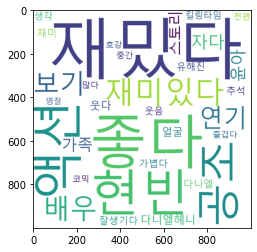

In [20]:
# 워드클라우드, 폰트설정
wc = WordCloud(font_path='c:\\Windows\\Fonts\\malgun.ttf', background_color="white", width=1000, height=1000, max_font_size=300)
gen = wc.generate_from_frequencies(c)
plt.figure()
plt.imshow(gen)
plt.savefig('./image/공조2_리뷰.png')

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
vectorizer = CountVectorizer()

# Document Term Matrix
dtm = vectorizer.fit_transform(more_than_time)

# Term Freqeuncy
tf = pd.DataFrame(dtm.toarray(), columns = vectorizer.get_feature_names())

C:\Users\hyha1\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
tf

,가볍다,가족,공조,다니엘,다니엘헤니,많다,명절,배우,보기,생각,...,재밌다,전편,좋다,중간,즐겁다,추석,코믹,킬링타임,현빈,호강
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [24]:
df = tf.astype(bool).sum(axis = 0)
df

가볍다       78
가족       110
공조       184
다니엘       84
다니엘헤니     99
많다        54
명절        50
배우       146
보기       136
생각        73
스토리      101
액션       257
얼굴        94
연기       136
웃다        96
웃음        72
유해진       76
윤아       118
자다       123
잘생기다      79
재미        83
재미있다     178
재밌다      443
전편        54
좋다       330
중간        58
즐겁다       55
추석        78
코믹        58
킬링타임      69
현빈       242
호강        53
dtype: int64

In [25]:
# 문서 개수
D = len(tf)

# Inverse Document Frequency
idf = np.log((D+1) / (df+1)) + 1
idf

가볍다      4.891045
가족       4.550963
공조       4.040137
다니엘      4.817842
다니엘헤니    4.655323
많다       5.253160
명절       5.328667
배우       4.270060
보기       4.340512
생각       4.956428
스토리      4.635520
액션       3.707533
얼굴       4.706616
연기       4.340512
웃다       4.685782
웃음       4.970033
유해진      4.916687
윤아       4.481369
자다       4.440211
잘생기다     4.878466
재미       4.829676
재미있다     4.073107
재밌다      3.164668
전편       5.253160
좋다       3.458374
중간       5.182955
즐겁다      5.235141
추석       4.891045
코믹       5.182955
킬링타임     5.011998
현빈       3.767431
호강       5.271509
dtype: float64

In [26]:
# TF-IDF
tfidf = tf * idf                      
tfidf = tfidf / np.linalg.norm(tfidf, axis = 1, keepdims = True)

In [27]:
tfidf

,가볍다,가족,공조,다니엘,다니엘헤니,많다,명절,배우,보기,생각,...,재밌다,전편,좋다,중간,즐겁다,추석,코믹,킬링타임,현빈,호강
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
